In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import glob
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [0]:
# fix random seed for reproducibility
np.random.seed(7)

In [3]:
# Importing drive to read the data from Google Drive.
from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Loading the twitter data.
path = r'/content/drive/My Drive/new_data/twitter_sentiment/Apple' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    print(filename)
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

# Pandas dataframe that contains twitter data for apple.
df_twitter_apple = pd.concat(li, axis=0, ignore_index=True)

# Cleaning the twitter data.
df_twitter_apple = df_twitter_apple[['Date', 'count_tweet', 'sum_followers_count','avg_weighted_avg_sentiment_2']]
df_twitter_apple = df_twitter_apple.rename(columns={'sum_followers_count': 'twitter_sum_followers_count', 'avg_weighted_avg_sentiment_2':'twitter_avg_sentiment', 'count_tweet':'tweet_count'})

/content/drive/My Drive/new_data/twitter_sentiment/Apple/AAPL_2017-01.csv
/content/drive/My Drive/new_data/twitter_sentiment/Apple/AAPL_2017-05.csv
/content/drive/My Drive/new_data/twitter_sentiment/Apple/AAPL_2017-03.csv
/content/drive/My Drive/new_data/twitter_sentiment/Apple/AAPL_2017-02.csv
/content/drive/My Drive/new_data/twitter_sentiment/Apple/AAPL_2017-06.csv
/content/drive/My Drive/new_data/twitter_sentiment/Apple/AAPL_2017-04.csv
/content/drive/My Drive/new_data/twitter_sentiment/Apple/AAPL_2017-08.csv
/content/drive/My Drive/new_data/twitter_sentiment/Apple/AAPL_2017-09.csv
/content/drive/My Drive/new_data/twitter_sentiment/Apple/AAPL_2017-11.csv
/content/drive/My Drive/new_data/twitter_sentiment/Apple/AAPL_2017-10.csv
/content/drive/My Drive/new_data/twitter_sentiment/Apple/AAPL_2018-01.csv
/content/drive/My Drive/new_data/twitter_sentiment/Apple/AAPL_2018-02.csv
/content/drive/My Drive/new_data/twitter_sentiment/Apple/AAPL_2018-08.csv
/content/drive/My Drive/new_data/twitt

In [0]:
# Reading the stock market data for apple into a Pandas dataframe.
df_stock_apple = pd.read_csv(r'/content/drive/My Drive/new_data/stock_data/AAPL_mod.csv')

In [6]:
# Loading the news data.
path = r'/content/drive/My Drive/new_data/news_sentiment/Apple_news/' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    print(filename)
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

# Pandas dataframe that contains the news data for apple.
df_news_apple = pd.concat(li, axis=0, ignore_index=True)

# Selecting the required columns.
df_news_apple = df_news_apple[['date', 'avg_weighted_sentiment_1', 'count_news']]

# Renaming the date to Date.
df_news_apple = df_news_apple.rename(columns={'date':'Date', 'avg_weighted_sentiment_1':'news_avg_sentiment'})

/content/drive/My Drive/new_data/news_sentiment/Apple_news/2017.csv
/content/drive/My Drive/new_data/news_sentiment/Apple_news/2014.csv
/content/drive/My Drive/new_data/news_sentiment/Apple_news/2016.csv
/content/drive/My Drive/new_data/news_sentiment/Apple_news/2018.csv
/content/drive/My Drive/new_data/news_sentiment/Apple_news/2015.csv
/content/drive/My Drive/new_data/news_sentiment/Apple_news/2013.csv
/content/drive/My Drive/new_data/news_sentiment/Apple_news/2012.csv


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [7]:
# Loading the news data.
path = r'/content/drive/My Drive/new_data/news_sentiment/Apple_Facebook_CNBC_Financial_sentiments/' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    print(filename)
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

# Pandas dataframe that contains the news data for apple.
df_financial_news_data = pd.concat(li, axis=0, ignore_index=True)

# Keeping only the data which is relevant to apple.
df_financial_news_apple = df_financial_news_data[(df_financial_news_data['company'] == 'apple')]

# Selecting the required columns.
df_financial_news_apple = df_financial_news_apple[['date', 'count_articles', 'avg_sentiment']]

# Renaming the date to Date.
df_financial_news_apple = df_financial_news_apple.rename(columns={'date':'Date','count_articles':'financial_count_articles', 'avg_sentiment':'financial_avg_sentiment'})

/content/drive/My Drive/new_data/news_sentiment/Apple_Facebook_CNBC_Financial_sentiments/financial_sentiment_2018-01.csv
/content/drive/My Drive/new_data/news_sentiment/Apple_Facebook_CNBC_Financial_sentiments/financial_sentiment_2018-03.csv
/content/drive/My Drive/new_data/news_sentiment/Apple_Facebook_CNBC_Financial_sentiments/financial_sentiment_2018-04.csv
/content/drive/My Drive/new_data/news_sentiment/Apple_Facebook_CNBC_Financial_sentiments/financial_sentiment_2018-05.csv
/content/drive/My Drive/new_data/news_sentiment/Apple_Facebook_CNBC_Financial_sentiments/financial_sentiment_2018-02.csv


In [8]:
# Pearson Correlation for stock data features.

df_stock_apple_dow_close_pearson = df_stock_apple[['DOW', 'Close']].corr(method = 'pearson')
df_stock_apple_high_close_pearson = df_stock_apple[['High', 'Close']].corr(method = 'pearson')
df_stock_apple_low_close_pearson = df_stock_apple[['Low', 'Close']].corr(method = 'pearson')
df_stock_apple_open_close_pearson = df_stock_apple[['Open', 'Close']].corr(method = 'pearson')
df_stock_apple_volume_close_pearson = df_stock_apple[['Volume', 'Close']].corr(method = 'pearson')
df_stock_apple_rd_close_pearson = df_stock_apple[['Running Difference', 'Close']].corr(method = 'pearson')
df_stock_apple_uscad_close_pearson = df_stock_apple[['US/CAD', 'Close']].corr(method = 'pearson')
df_stock_apple_vwap_close_pearson = df_stock_apple[['VWAP', 'Close']].corr(method = 'pearson')


print('Pearson correlation between Day of Week and Close is:')
print(df_stock_apple_dow_close_pearson)
print('\n')
print('Pearson correlation between High and Close is:')
print(df_stock_apple_high_close_pearson)
print('\n')
print('Pearson correlation between Low and Close is:')
print(df_stock_apple_low_close_pearson)
print('\n')
print('Pearson correlation between Open and Close is:')
print(df_stock_apple_open_close_pearson)
print('\n')
print('Pearson correlation between Volume and Close is:')
print(df_stock_apple_volume_close_pearson)
print('\n')
print('Pearson correlation between Running Difference and Close is:')
print(df_stock_apple_rd_close_pearson)
print('\n')
print('Pearson correlation between US/CAD exchange rate and Close is:')
print(df_stock_apple_uscad_close_pearson)
print('\n')
print('Pearson correlation between VWAP(Volume Weighted Average Price) and Close is:')
print(df_stock_apple_vwap_close_pearson)
print('\n')


# Spearman Correlation for stock data features.

df_stock_apple_dow_close_spearman = df_stock_apple[['DOW', 'Close']].corr(method = 'spearman')
df_stock_apple_high_close_spearman = df_stock_apple[['High', 'Close']].corr(method = 'spearman')
df_stock_apple_low_close_spearman = df_stock_apple[['Low', 'Close']].corr(method = 'spearman')
df_stock_apple_open_close_spearman = df_stock_apple[['Open', 'Close']].corr(method = 'spearman')
df_stock_apple_volume_close_spearman = df_stock_apple[['Volume', 'Close']].corr(method = 'spearman')
df_stock_apple_rd_close_spearman = df_stock_apple[['Running Difference', 'Close']].corr(method = 'spearman')
df_stock_apple_uscad_close_spearman = df_stock_apple[['US/CAD', 'Close']].corr(method = 'spearman')
df_stock_apple_vwap_close_spearman = df_stock_apple[['VWAP', 'Close']].corr(method = 'spearman')


print('Spearman correlation between Day of Week and Close is:')
print(df_stock_apple_dow_close_spearman)
print('\n')
print('Spearman correlation between High and Close is:')
print(df_stock_apple_high_close_spearman)
print('\n')
print('Spearman correlation between Low and Close is:')
print(df_stock_apple_low_close_spearman)
print('\n')
print('Spearman correlation between Open and Close is:')
print(df_stock_apple_open_close_spearman)
print('\n')
print('Spearman correlation between Volume and Close is:')
print(df_stock_apple_volume_close_spearman)
print('\n')
print('Spearman correlation between Running Difference and Close is:')
print(df_stock_apple_rd_close_spearman)
print('\n')
print('Spearman correlation between US/CAD exchange rate and Close is:')
print(df_stock_apple_uscad_close_spearman)
print('\n')
print('Spearman correlation between VWAP(Volume Weighted Average Price) and Close is:')
print(df_stock_apple_vwap_close_spearman)
print('\n')

Pearson correlation between Day of Week and Close is:
            DOW     Close
DOW    1.000000 -0.001226
Close -0.001226  1.000000


Pearson correlation between High and Close is:
           High     Close
High   1.000000  0.999722
Close  0.999722  1.000000


Pearson correlation between Low and Close is:
            Low     Close
Low    1.000000  0.999744
Close  0.999744  1.000000


Pearson correlation between Open and Close is:
           Open     Close
Open   1.000000  0.999425
Close  0.999425  1.000000


Pearson correlation between Volume and Close is:
          Volume     Close
Volume  1.000000  0.204484
Close   0.204484  1.000000


Pearson correlation between Running Difference and Close is:
                    Running Difference     Close
Running Difference            1.000000  0.343693
Close                         0.343693  1.000000


Pearson correlation between US/CAD exchange rate and Close is:
          US/CAD     Close
US/CAD  1.000000  0.720408
Close   0.720408  1.000000


In [9]:
# Pearson correlation for stock and twitter data.

# Inner joining with the stock and the twitter data.

df_stock_twitter = pd.merge(df_stock_apple, df_twitter_apple, on='Date')
df_stock_twitter['tweet_count'] = df_stock_twitter['tweet_count'].astype(np.float64)

# Pearson Correlation for stock data features.
df_stock_twitter_apple_tweet_count_close_pearson = df_stock_twitter[['tweet_count', 'Close']].corr(method = 'pearson')
# df_stock_twitter_apple_twitter_sum_close_pearson = df_stock_twitter[['twitter_sum_followers_count', 'Close']].corr(method = 'pearson')
df_stock_twitter_apple_twitter_avg_sentiment_close_pearson = df_stock_twitter[['twitter_avg_sentiment', 'Close']].corr(method = 'pearson')

print('Pearson correlation between tweet_count and Close is:')
print(df_stock_twitter_apple_tweet_count_close_pearson)
print('\n')
# print('Pearson correlation between twitter_sum_followers_count and Close is:')
# print(df_stock_twitter_apple_twitter_sum_close_pearson)
# print('\n')
print('Pearson correlation between twitter_avg_sentiment and Close is:')
print(df_stock_twitter_apple_twitter_avg_sentiment_close_pearson)
print('\n')


# Spearman Correlation for stock data features.
df_stock_twitter_apple_tweet_count_close_spearman = df_stock_twitter[['tweet_count', 'Close']].corr(method = 'spearman')
# df_stock_twitter_apple_twitter_sum_close_spearman = df_stock_twitter[['twitter_sum_followers_count', 'Close']].corr(method = 'spearman')
df_stock_twitter_apple_twitter_avg_sentiment_close_spearman = df_stock_twitter[['twitter_avg_sentiment', 'Close']].corr(method = 'spearman')

print('Spearman correlation between tweet_count and Close is:')
print(df_stock_twitter_apple_tweet_count_close_spearman)
print('\n')
# print('Spearman correlation between twitter_sum_followers_count and Close is:')
# print(df_stock_twitter_apple_twitter_sum_close_spearman)
# print('\n')
print('Spearman correlation between twitter_avg_sentiment and Close is:')
print(df_stock_twitter_apple_twitter_avg_sentiment_close_spearman)
print('\n')

Pearson correlation between tweet_count and Close is:
             tweet_count     Close
tweet_count     1.000000 -0.091321
Close          -0.091321  1.000000


Pearson correlation between twitter_avg_sentiment and Close is:
                       twitter_avg_sentiment    Close
twitter_avg_sentiment                1.00000 -0.08826
Close                               -0.08826  1.00000


Spearman correlation between tweet_count and Close is:
             tweet_count     Close
tweet_count     1.000000 -0.424871
Close          -0.424871  1.000000


Spearman correlation between twitter_avg_sentiment and Close is:
                       twitter_avg_sentiment     Close
twitter_avg_sentiment               1.000000 -0.086189
Close                              -0.086189  1.000000




In [10]:
# Inner joining the stock and the news data.
df_stock_news_apple = pd.merge(df_stock_apple, df_news_apple, on='Date')
df_stock_news_apple.columns

# Pearson Correlation for stock data features.
df_stock_twitter_apple_tweet_count_close_pearson = df_stock_news_apple[['news_avg_sentiment', 'Close']].corr(method = 'pearson')
df_stock_twitter_apple_twitter_avg_sentiment_close_pearson = df_stock_news_apple[['count_news', 'Close']].corr(method = 'pearson')

print('Pearson correlation between news_avg_sentiment and Close is:')
print(df_stock_twitter_apple_tweet_count_close_pearson)
print('\n')

print('Pearson correlation between count_news and Close is:')
print(df_stock_twitter_apple_twitter_avg_sentiment_close_pearson)
print('\n')

# Spearman Correlation for stock data features.
df_stock_twitter_apple_tweet_count_close_spearman = df_stock_news_apple[['news_avg_sentiment', 'Close']].corr(method = 'spearman')
df_stock_twitter_apple_twitter_avg_sentiment_close_spearman = df_stock_news_apple[['count_news', 'Close']].corr(method = 'spearman')

print('Spearman correlation between news_avg_sentiment and Close is:')
print(df_stock_twitter_apple_tweet_count_close_spearman)
print('\n')

print('Spearman correlation between count_news and Close is:')
print(df_stock_twitter_apple_twitter_avg_sentiment_close_spearman)
print('\n')


Pearson correlation between news_avg_sentiment and Close is:
                    news_avg_sentiment     Close
news_avg_sentiment            1.000000 -0.003421
Close                        -0.003421  1.000000


Pearson correlation between count_news and Close is:
            count_news     Close
count_news    1.000000 -0.199476
Close        -0.199476  1.000000


Spearman correlation between news_avg_sentiment and Close is:
                    news_avg_sentiment     Close
news_avg_sentiment            1.000000 -0.099409
Close                        -0.099409  1.000000


Spearman correlation between count_news and Close is:
            count_news     Close
count_news    1.000000 -0.190386
Close        -0.190386  1.000000




In [0]:
# Joining with the huffinton news data.
# Inner joining the stock and the news data.
df_stock_news = pd.merge(df_stock_apple, df_news_apple, on='Date')
# Inner joining the stock,news and the twitter data.
df_stock_news_twitter_apple_dates = pd.merge(df_stock_news, df_twitter_apple, on='Date')


# # Joining with the financial news dataset.
# # Inner joining the stock and the news data.
# df_stock_news = pd.merge(df_stock_apple, df_financial_news_apple, on='Date')
# # Inner joining the stock,news and the twitter data.
# df_stock_news_twitter_apple = pd.merge(df_stock_news, df_twitter_apple, on='Date')

In [0]:
# df_stock_news_twitter_apple_dates

In [0]:
# # Huffington
# # Selecting the required number of columns and rearranging them.
# df_stock_news_twitter_apple = df_stock_news_twitter_apple[['DOW', 'Open', 'High', 'Low', 'Volume', 'Running Difference', 'US/CAD', 'VWAP', 'tweet_count', 'twitter_sum_followers_count', 'twitter_avg_sentiment', 'news_avg_sentiment', 'count_news', 'Close']]

# # Case 1: Stock Data
# df_stock_news_twitter_apple = df_stock_news_twitter_apple_dates[['DOW', 'Open', 'High', 'Low', 'Volume', 'Running Difference', 'US/CAD', 'VWAP', 'Close']]
# # Case 2: Stock + twitter
# df_stock_news_twitter_apple = df_stock_news_twitter_apple[['DOW', 'Open', 'High', 'Low', 'Volume', 'Running Difference', 'US/CAD', 'VWAP', 'tweet_count', 'twitter_sum_followers_count', 'twitter_avg_sentiment', 'Close']]
# # Case 3: Stock + huffington
# df_stock_news_twitter_apple = df_stock_news_twitter_apple_dates[['DOW', 'Open', 'High', 'Low', 'Volume', 'Running Difference', 'US/CAD', 'VWAP', 'news_avg_sentiment', 'count_news', 'Close']]
# # # Case 4: Stock + huffington + twitter
# df_stock_news_twitter_apple = df_stock_news_twitter_apple[['DOW', 'Open', 'High', 'Low', 'Volume', 'Running Difference', 'US/CAD', 'VWAP', 'tweet_count', 'twitter_sum_followers_count', 'twitter_avg_sentiment', 'news_avg_sentiment', 'count_news', 'Close']]

# # Financial news data.

# # Case 5: Stock + finance
# df_stock_news_twitter_apple = df_stock_news_twitter_apple[['DOW', 'Open', 'High', 'Low', 'Volume', 'Running Difference', 'US/CAD', 'VWAP', 'financial_count_articles', 'financial_avg_sentiment', 'Close']]

# # Case 6: Stock + finance + twitter
# df_stock_news_twitter_apple = df_stock_news_twitter_apple[['DOW', 'Open', 'High', 'Low', 'Volume', 'Running Difference', 'US/CAD', 'VWAP', 'tweet_count', 'twitter_sum_followers_count', 'twitter_avg_sentiment', 'financial_count_articles', 'financial_avg_sentiment', 'Close']]

In [0]:
df_stock_news_apple = pd.merge(df_stock_apple, df_news_apple, on='Date')
df_stock_twitter = pd.merge(df_stock_apple, df_twitter_apple, on='Date')

# # Case 1: Stock Data.
df_stock_news_twitter_apple = df_stock_apple[['Open', 'High', 'Low', 'Volume', 'Running Difference', 'US/CAD', 'VWAP', 'Close']]

# Index(['Close', 'DOW', 'Date', 'High', 'Low', 'Open', 'Running Difference',
#        'US/CAD', 'VWAP', 'Volume'],
#       dtype='object')

# Case 2: Stock + News Data.
# Inner joining the stock and the news data.
# df_stock_news_twitter_apple = df_stock_news_apple[['DOW', 'Open', 'High', 'Low', 'Volume', 'Running Difference', 'US/CAD', 'VWAP', 'news_avg_sentiment', 'count_news', 'Close']]
# Index(['Close', 'DOW', 'Date', 'High', 'Low', 'Open', 'Running Difference',
#        'US/CAD', 'VWAP', 'Volume', 'news_avg_sentiment', 'count_news'],
#       dtype='object')

# Case 3: Stock + Twitter Data.
# Inner joining with the stock and the twitter data.
# df_stock_twitter['tweet_count'] = df_stock_twitter['tweet_count'].astype(np.float64)
# df_stock_news_twitter_apple = df_stock_twitter[['DOW', 'Open', 'High', 'Low', 'Volume', 'Running Difference', 'US/CAD', 'VWAP', 'tweet_count', 'twitter_sum_followers_count', 'twitter_avg_sentiment', 'Close']]

# Index(['Close', 'DOW', 'Date', 'High', 'Low', 'Open', 'Running Difference',
#        'US/CAD', 'VWAP', 'Volume', 'tweet_count',
#        'twitter_sum_followers_count', 'twitter_avg_sentiment'],
#       dtype='object')


# Case 4: Stock + News + Twitter Data.
# df_stock_news_twitter_apple = df_stock_news_twitter_apple_dates[['DOW', 'Open', 'High', 'Low', 'Volume', 'Running Difference', 'US/CAD', 'VWAP', 'tweet_count', 'twitter_sum_followers_count', 'twitter_avg_sentiment', 'news_avg_sentiment', 'count_news', 'Close']]

# Index(['Close', 'DOW', 'Date', 'High', 'Low', 'Open', 'Running Difference',
#        'US/CAD', 'VWAP', 'Volume', 'news_avg_sentiment', 'count_news',
#        'tweet_count', 'twitter_sum_followers_count', 'twitter_avg_sentiment'],
#       dtype='object')

In [15]:
print(df_stock_news_twitter_apple.shape)
df_stock_news_twitter_apple = df_stock_news_twitter_apple.dropna()
print(df_stock_news_twitter_apple.shape)

(1808, 8)
(1552, 8)


In [0]:
# df_stock_news_twitter_apple['Date'].to_csv('abc.csv')

In [0]:
all_data_list = df_stock_news_twitter_apple.values
all_data_list = all_data_list.astype('float32')

In [18]:
all_data_list.shape

(1552, 8)

In [19]:
all_data_list[0]

array([5.2613605e+01, 5.3012001e+01, 5.2562199e+01, 1.0793600e+07,
       4.4979879e-01, 1.0089000e+00, 5.2759148e+01, 5.2848785e+01],
      dtype=float32)

In [0]:
num_of_features = all_data_list.shape[1] - 1

In [0]:
# Normalize the dataset
scaler_train = MinMaxScaler(feature_range=(0, 1))
dataset_1 = scaler_train.fit_transform(all_data_list[:,:num_of_features])

scaler_test = MinMaxScaler(feature_range=(0, 1))
dataset_2 = scaler_test.fit_transform(all_data_list[:,num_of_features:num_of_features+1])

ds_scaled = np.column_stack((dataset_1,dataset_2))

In [22]:
ds_scaled.shape

(1552, 8)

In [23]:
ds_scaled[0]

array([0.01529342, 0.00685287, 0.01801318, 0.02767768, 0.01379376,
       0.07763231, 0.        , 0.01467979], dtype=float32)

In [24]:
# split into train and test sets
train_size = int(len(ds_scaled) * 0.7)
test_size = len(ds_scaled) - train_size
train, test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:]
print(len(train), len(test))


1086 466


In [25]:
train.shape

(1086, 8)

In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0:num_of_features]
		dataX.append(a)
		dataY.append(dataset[i + look_back, num_of_features])
	return np.array(dataX), np.array(dataY)

In [0]:
# reshape into X=t and Y=t+1
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [28]:
trainX.shape

(1080, 5, 7)

In [0]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], num_of_features, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], num_of_features, testX.shape[1]))

In [30]:
testY.shape

(460,)

In [31]:
x_axis = df_stock_news_twitter_apple_dates[['Date']]
x_axis.head

<bound method NDFrame.head of            Date
0    2017-01-03
1    2017-01-04
2    2017-01-05
3    2017-01-09
4    2017-01-13
5    2017-01-18
6    2017-01-24
7    2017-01-27
8    2017-01-30
9    2017-01-31
10   2017-01-31
11   2017-02-02
12   2017-02-06
13   2017-02-07
14   2017-02-10
15   2017-02-16
16   2017-02-21
17   2017-02-22
18   2017-02-28
19   2017-02-28
20   2017-03-01
21   2017-03-03
22   2017-03-07
23   2017-03-08
24   2017-03-09
25   2017-03-15
26   2017-03-16
27   2017-03-17
28   2017-03-20
29   2017-03-21
..          ...
112  2017-11-09
113  2017-11-13
114  2017-11-15
115  2017-11-27
116  2017-11-30
117  2018-01-05
118  2018-01-08
119  2018-01-10
120  2018-01-17
121  2018-01-18
122  2018-01-23
123  2018-01-25
124  2018-01-29
125  2018-01-30
126  2018-02-07
127  2018-02-08
128  2018-02-12
129  2018-02-13
130  2018-02-20
131  2018-02-21
132  2018-02-23
133  2018-03-02
134  2018-03-06
135  2018-03-07
136  2018-03-08
137  2018-03-12
138  2018-03-14
139  2018-03-23
140  2018-

In [32]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(trainX.shape[1], look_back)))
# model.add(Bidirectional(LSTM(8, input_shape=(trainX.shape[1], look_back))))
# model.add(Dropout(0.5))
# model.add(Dense(32, activation='selu'))
model.add(Dense(32))
# model.add(Dense(32, activation='selu'))
# model.add(Dense(1))
# model.add(Dropout(0.5))
# model.add(Dense(32, activation='selu'))
# model.add(Dropout(0.5))
# model.add(Dense(32, activation='selu'))
# model.add(Dropout(0.5))
model.add(Dense(1)) 

# Default learning rate - 0.001.
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.002))
# model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=2, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1080/1080 [==============================] - 3s 3ms/step - loss: 0.0059
Epoch 2/10
1080/1080 [==============================] - 2s 2ms/step - loss: 0.0020
Epoch 3/10
1080/1080 [==============================] - 2s 2ms/step - loss: 9.0251e-04
Epoch 4/10
1080/1080 [==============================] - 2s 2ms/step - loss: 5.5873e-04
Epoch 5/10
1080/1080 [==============================] - 3s 2ms/step - loss: 4.5024e-04
Epoch 6/10
1080/1080 [==============================] - 3s 2ms/step - loss: 4.0782e-04
Epoch 7/10
1080/1080 [==============================] - 3s 2ms/step - loss: 3.3702e-04
Epoch 8/10
1080/1080 [==============================] - 3s 2ms/step - loss: 2.9002e-04
Epoch 9/10
1080/1080 [==============================] - 2s 2ms/step - loss: 3.2653e-04
Epoch 10/10
1080/1080 [==============================] - 2s 2ms/step - loss: 2.7365e-04


In [0]:
# import eli5
# from eli5.sklearn import PermutationImportance

# perm = PermutationImportance(model, random_state=1, scoring='f1').fit(trainX, trainY)
# eli5.show_weights(perm, feature_names = trainX.columns.tolist())

In [0]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [0]:
# testX

In [36]:
trainPredict.shape

(1080, 1)

In [37]:
trainPredict_rescaled = scaler_test.inverse_transform(trainPredict)
trainPredict_rescaled.shape

(1080, 1)

In [38]:
# invert predictions
trainPredict_rescaled = scaler_test.inverse_transform(trainPredict)
trainY_rescaled = scaler_test.inverse_transform([trainY])
testPredict_rescaled = scaler_test.inverse_transform(testPredict)
testY_rescaled = scaler_test.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY_rescaled[0], trainPredict_rescaled[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY_rescaled[0], testPredict_rescaled[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.64 RMSE
Test Score: 2.97 RMSE


In [39]:
testY_rescaled.T.shape

(460, 1)

In [40]:
testPredict_rescaled.shape

(460, 1)

In [0]:
# shift train predictions for plotting
trainY_rescaled_plot = np.empty_like(ds_scaled)
trainY_rescaled_plot[:, :] = np.nan
trainY_rescaled_plot[look_back:len(trainY_rescaled.T)+look_back, :] = trainY_rescaled.T

# shift train predictions for plotting
trainPredictPlot = np.empty_like(ds_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict_rescaled)+look_back, :] = trainPredict_rescaled

# shift test predictions for plotting
testY_rescaled_plot = np.empty_like(ds_scaled)
testY_rescaled_plot[:, :] = np.nan
testY_rescaled_plot[len(trainY_rescaled.T)+(look_back*2)+1:len(ds_scaled)-1, :] = testY_rescaled.T

# shift test predictions for plotting
testPredictPlot = np.empty_like(ds_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict_rescaled)+(look_back*2)+1:len(ds_scaled)-1, :] = testPredict_rescaled

# normalize the dataset
dataset_back_1 = scaler_train.inverse_transform(ds_scaled[:,:num_of_features])

dataset_back_2 = scaler_test.inverse_transform(ds_scaled[:,num_of_features:num_of_features+1])

ds_back_scaled = np.column_stack((dataset_back_1,dataset_back_2))


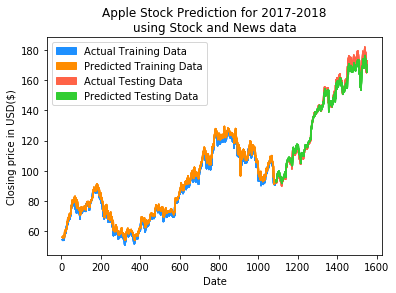

In [42]:
# x_axis_train_list = x_axis_train.tolist()
# x_axis_test_list = x_axis_test.tolist()

# xi = [i for i in range(0, len(x_axis_train_list))]

plt.plot(trainY_rescaled_plot, 'dodgerblue')
plt.plot(trainPredictPlot, 'darkorange')
plt.plot(testY_rescaled_plot, 'tomato')
plt.plot(testPredictPlot, 'limegreen')

# np.savetxt("trainY.csv", trainY_rescaled_plot, delimiter=",")
# np.savetxt("trainPredict.csv", trainPredictPlot, delimiter=",")
# np.savetxt("testY.csv", testY_rescaled_plot, delimiter=",")
# np.savetxt("testPredict.csv", testPredictPlot+3, delimiter=",")

## convert your array into a dataframe
df_date = pd.DataFrame(x_axis)
df_trainY = pd.DataFrame(trainY_rescaled_plot)
df_trainY = df_trainY.iloc[:,0] # first column of data frame (first_name)
df_trainPredict = pd.DataFrame(trainPredictPlot)
df_trainPredict = df_trainPredict.iloc[:,0] # first column of data frame (first_name)
df_testY = pd.DataFrame(testY_rescaled_plot)
df_testY = df_testY.iloc[:,0] # first column of data frame (first_name)
df_testPredict = pd.DataFrame(testPredictPlot)
df_testPredict = df_testPredict.iloc[:,0] # first column of data frame (first_name)

## save to xlsx file
# filepath1 = 'df_trainY.xlsx'
# filepath2 = 'df_trainPredict.xlsx'
# filepath3 = 'df_testY.xlsx'
# filepath4 = 'df_testPredict.xlsx'
# filepath5 = 'df_date.xlsx'

# df_trainY.to_excel(filepath1, index=False)
# df_trainPredict.to_excel(filepath2, index=False)
# df_testY.to_excel(filepath3, index=False)
# df_testPredict.to_excel(filepath4, index=False)
# df_date.to_excel(filepath5, index=False)


# ax.set_xticks(x_axis_train_list)
plt.xlabel('Date')
plt.ylabel('Closing price in USD($)')

blue_patch = mpatches.Patch(color='dodgerblue', label = 'Actual Training Data')
green_patch = mpatches.Patch(color='darkorange', label = 'Predicted Training Data')
red_patch = mpatches.Patch(color='tomato', label = 'Actual Testing Data')
violet_patch = mpatches.Patch(color='limegreen', label = 'Predicted Testing Data')

# plt.xticks(range(len(x_axis)),x_axis)

plt.legend(handles=[blue_patch, green_patch, red_patch, violet_patch])

# plt.xticks(str(x_axis_train_list))
# x = [5,10,15,20,25,30,35]
# xi = [i for i in range(0, 50)]
# plt.xticks('x_axis')

# plt.xticks( np.arange(100), [12,23,23,21,2,1,2,1,21,21,2,1,21], rotation=17 )

# plt.xticks(x_axis_train.tolist())
plt.title('Apple Stock Prediction for 2017-2018\nusing Stock and News data')
plt.savefig('Case_1.jpeg', dpi = 1000, quality = 100)
plt.show()

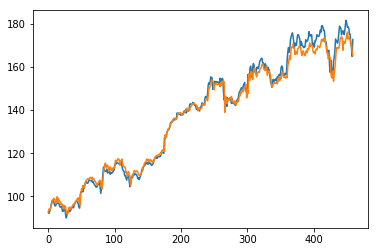

In [43]:
plt.plot(testY_rescaled[0])
plt.plot(testPredict_rescaled)
plt.show()